In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  

df=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,22,Female,Pop,Indie/Acoustic,Pop,Instrumental,EDM
1,23,Male,EDM,Instrumental,Rock,Instrumental,Instrumental
2,23,Female,Indie/Acoustic,Instrumental,Blues,Instrumental,EDM
3,21,Female,Pop,Country,Blues,Pop,Pop
4,22,Male,Instrumental,Hiphop,Indie/Acoustic,Instrumental,Rock


In [146]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))
df.describe()

Age : [22 23 21 24 25 31 27 19 29 32 28 33 34 20 18 30 39 36 37 55 47 42 49 45]
Gender : ['Female' 'Male']
Happy : ['Pop' 'EDM' 'Indie/Acoustic' 'Instrumental' 'Hiphop' 'Rock' 'Blues'
 'Country']
Gloomy : ['Indie/Acoustic' 'Instrumental' 'Country' 'Hiphop' 'EDM' 'Blues' 'Rock'
 'Pop']
Stressed : ['Pop' 'Rock' 'Blues' 'Indie/Acoustic' 'Instrumental' 'Hiphop' 'EDM'
 'Country']
Relaxing : ['Instrumental' 'Pop' 'Rock' 'Indie/Acoustic' 'Country' 'Blues' 'EDM']
Energetic : ['EDM' 'Instrumental' 'Pop' 'Rock' 'Blues' 'Hiphop' 'Country'
 'Indie/Acoustic']


,Age
count,67.000000
mean,28.552239
std,8.432052
min,18.000000
25%,22.000000
50%,25.000000
75%,33.000000
max,55.000000


In [3]:
#Checking for null values to fill
df.isnull().sum()

Age          0
Gender       0
Happy        0
Gloomy       0
Stressed     0
Relaxing     0
Energetic    0
dtype: int64

In [4]:
#Replacing categorical data with integer values

df['Gender'].replace(['Male','Female'],[0,1], inplace=True)

df.head(7)


,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,22,1,Pop,Indie/Acoustic,Pop,Instrumental,EDM
1,23,0,EDM,Instrumental,Rock,Instrumental,Instrumental
2,23,1,Indie/Acoustic,Instrumental,Blues,Instrumental,EDM
3,21,1,Pop,Country,Blues,Pop,Pop
4,22,0,Instrumental,Hiphop,Indie/Acoustic,Instrumental,Rock
5,21,1,Indie/Acoustic,EDM,Instrumental,Rock,Pop
6,22,1,Hiphop,Instrumental,Indie/Acoustic,Indie/Acoustic,Pop


In [5]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(67, 7)


In [7]:
#Replacing NaN instances with mean values
columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,Age,Gender,Happy,Gloomy,Stressed,Relaxing,Energetic
0,22,1,Pop,Indie/Acoustic,Pop,Instrumental,EDM
1,23,0,EDM,Instrumental,Rock,Instrumental,Instrumental
2,23,1,Indie/Acoustic,Instrumental,Blues,Instrumental,EDM
3,21,1,Pop,Country,Blues,Pop,Pop
4,22,0,Instrumental,Hiphop,Indie/Acoustic,Instrumental,Rock


In [8]:
#Checking for null values again
df.isnull().sum()

Age          0
Gender       0
Happy        0
Gloomy       0
Stressed     0
Relaxing     0
Energetic    0
dtype: int64

Text(0.5, 1.0, 'Count of demographics in dataset:')

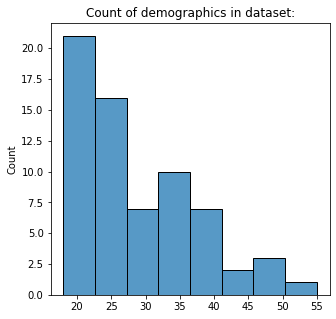

In [9]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(x = df.Age.values, data=df)
ax.set_title("Count of demographics in dataset:")

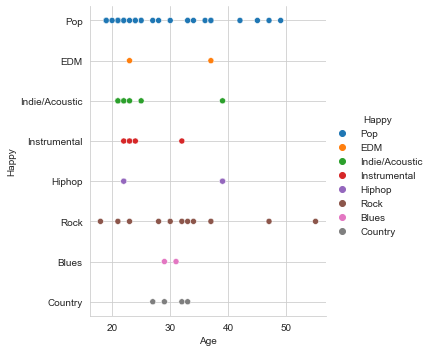

In [10]:
sns.set_style("whitegrid");
sns.relplot(x='Age',y='Happy',hue='Happy', data=df)
plt.show();

In [11]:
#Model testing
X=df[['Age','Gender']]
y=df['Happy','Gloomy','Stressed','Relaxing','Energetic']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
predictions

KeyError: ('Happy', 'Gloomy', 'Stressed', 'Relaxing', 'Energetic')

<AxesSubplot:>

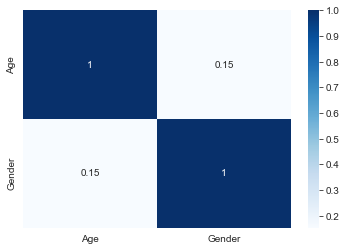

In [12]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

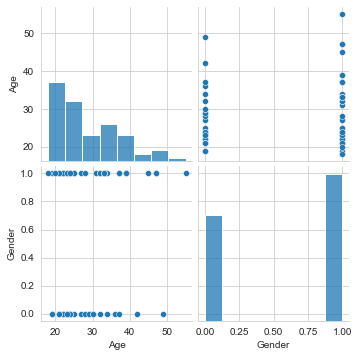

In [13]:
sns.pairplot(df)

In [14]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

print(
    (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
)

      Age  Energetic  Gender  Gloomy  Happy  Relaxing  Stressed
0   False      False   False   False  False     False     False
1   False      False   False   False  False     False     False
2   False      False   False   False  False     False     False
3   False      False   False   False  False     False     False
4   False      False   False   False  False     False     False
..    ...        ...     ...     ...    ...       ...       ...
62  False      False   False   False  False     False     False
63  False      False   False   False  False     False     False
64  False      False   False   False  False     False     False
65  False      False   False   False  False     False     False
66  False      False   False   False  False     False     False

[67 rows x 7 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_7888\2550581116.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
